# Summary


In [ ]:
#Install Packages
!pip install app-store-scraper
!pip install wordcloud

#Import Libraries
from app_store_scraper import AppStore

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import json,os,uuid
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into a

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Collect all the ChatGPT reviews from App Store
a_reviews = AppStore('us','chatgpt','333903271')
a_reviews.review(sleep=1)

In [ ]:
data = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head()

,date,review,rating,isEdited,userName,title,developerResponse
0,2023-10-16 00:30:03,In a world where all other social media sites ...,5,False,RepHolt,My take on X,NaN
1,2023-08-24 20:53:19,A lot of acknowledgments are sparse through a ...,5,False,Narcii Jester,Interested,NaN
2,2023-08-16 18:33:25,Twitter was perfectly fine before it was bough...,3,False,Da geek of dis game,Just an insecure billionaire needing to put us...,NaN
3,2023-08-22 14:28:02,"I never liked Twitter before Elon but gosh, he...",2,False,~pickle~,Twitter’s inevitable decline,NaN
4,2023-09-24 19:54:10,"X, formerly known as Twitter is the great mode...",5,False,Crazydavey59,The Evolution of X,NaN


In [ ]:
data.shape

(24820, 7)

In [ ]:
data.drop(['isEdited','userName','developerResponse'],axis=1,inplace=True) #Delete columns
data = data[['date','title','review','rating']] #Rearrange columns
data.head()

,date,title,review,rating
0,2023-10-16 00:30:03,My take on X,In a world where all other social media sites ...,5
1,2023-08-24 20:53:19,Interested,A lot of acknowledgments are sparse through a ...,5
2,2023-08-16 18:33:25,Just an insecure billionaire needing to put us...,Twitter was perfectly fine before it was bough...,3
3,2023-08-22 14:28:02,Twitter’s inevitable decline,"I never liked Twitter before Elon but gosh, he...",2
4,2023-09-24 19:54:10,The Evolution of X,"X, formerly known as Twitter is the great mode...",5


In [ ]:
data.to_excel('X_reviews.xlsx', index=False)

In [ ]:
data.to_csv('X_reviews.csv', index=False)

In [ ]:
data.head()

,date,title,review,rating
0,2023-10-16 00:30:03,My take on X,In a world where all other social media sites ...,5
1,2023-08-24 20:53:19,Interested,A lot of acknowledgments are sparse through a ...,5
2,2023-08-16 18:33:25,Just an insecure billionaire needing to put us...,Twitter was perfectly fine before it was bough...,3
3,2023-08-22 14:28:02,Twitter’s inevitable decline,"I never liked Twitter before Elon but gosh, he...",2
4,2023-09-24 19:54:10,The Evolution of X,"X, formerly known as Twitter is the great mode...",5


# EDA

In [ ]:
data = pd.read_csv('X_reviews.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12700 entries, 0 to 12699
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    12700 non-null  object
 1   title   12700 non-null  object
 2   review  12700 non-null  object
 3   rating  12700 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 397.0+ KB


In [ ]:
data.shape

(12700, 4)

In [ ]:
data.describe()

,rating
count,12700.000000
mean,3.548425
std,1.711797
min,1.000000
25%,1.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
data.describe(include='object')

,date,title,review
count,12700,12700,12700
unique,12699,11054,12700
top,2019-07-26 11:39:21,Censorship,In a world where all other social media sites ...
freq,2,142,1


Analysis of Rating Column

In [ ]:
#Rating Distribution
data['rating'].value_counts().sort_index()

1    3243
2     772
3     994
4    1159
5    6532
Name: rating, dtype: int64

In [ ]:
data['rating'].value_counts(normalize=True).mul(100).round(2).sort_index()

1    25.54
2     6.08
3     7.83
4     9.13
5    51.43
Name: rating, dtype: float64

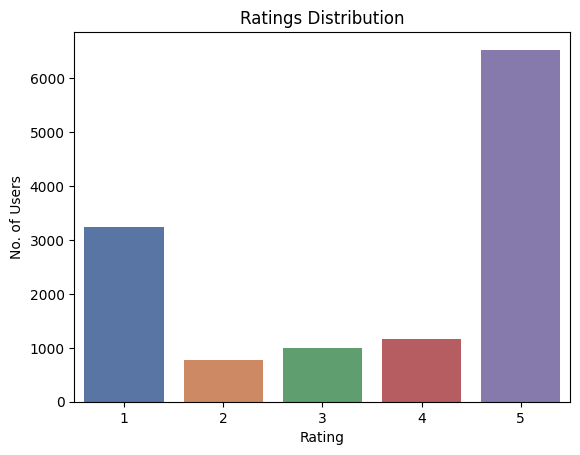

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.countplot(data=data, x='rating')

plt.xlabel('Rating')
plt.ylabel('No. of Users')
plt.title('Ratings Distribution')

plt.show()

# Data Preprocessing

In [ ]:
#Find no. of missing values in each column
data.isnull().sum().sort_values(ascending=False)

date      0
title     0
review    0
rating    0
dtype: int64

In [ ]:
#Combine Review Time and Review
data['complete_review'] = data['title'] +' .'+data['review']

In [ ]:
#Drop some columns which we won't use for sentiment analysis of review
remove_cols = ['date','review','title']
data = data.drop(remove_cols,axis='columns')

In [ ]:
data.head()

,rating,complete_review
0,5,My take on X .In a world where all other socia...
1,5,Interested .A lot of acknowledgments are spars...
2,3,Just an insecure billionaire needing to put us...
3,2,Twitter’s inevitable decline .I never liked Tw...
4,5,"The Evolution of X .X, formerly known as Twitt..."


1. Convert all the reviews to lowercase

In [ ]:
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['complete_review'].head()

0    my take on x .in a world where all other socia...
1    interested .a lot of acknowledgments are spars...
2    just an insecure billionaire needing to put us...
3    twitter’s inevitable decline .i never liked tw...
4    the evolution of x .x, formerly known as twitt...
Name: complete_review, dtype: object

2. Remove Punctuation

In [ ]:
data['complete_review'] = data['complete_review'].str.replace('[^\w\s]','')

3. Remove Emojis

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data['complete_review'] = data['complete_review'].apply(lambda x: remove_emoji(x))

4. Remove Stopwords

Stopwords are commonly used words (i.e. “the”, “a”, “an”) that do not add meaning to a sentence and can be ignored without having a drastic effect on the meaning of the sentence.

In [ ]:
stop = stopwords.words('english')
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

5. Apply Lemmatization

In [ ]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
data['complete_review']= data['complete_review'].apply(space)

6. Remove certain words

  These are specific to app and won't show any sentiments

In [ ]:
words_to_remove = ['chatgpt','app','chatgpts','chat','gpt','iphone','ipad','gpt4','phone','number','ai','use','io']
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in words_to_remove))

7. Map ratings to positive, negative & neutral sentiment

0 will represent negative sentiment

1 will represent neutral sentiment

2 will represent positive sentiment


In [ ]:
data['sentiment'] = data['rating'].apply(lambda rating: 2 if rating > 3 else (1 if rating == 3 else 0))
data.head(5)

,rating,complete_review,sentiment
0,5,take x world social medium site become artific...,2
1,5,interested lot acknowledgment sparse atmospher...,2
2,3,insecure billionaire need put we hark somethin...,1
3,2,twitter inevitable decline never like twitter ...,0
4,5,evolution x x formerly know twitter great mode...,2


In [ ]:
data['sentiment'].value_counts(normalize=True).mul(100).round(2)

2    60.56
0    31.61
1     7.83
Name: sentiment, dtype: float64

Data is Imbalanced as about 66% of sentiment is positive, 24% is negative and 9.5% is neutral.

# Reviews Analysis

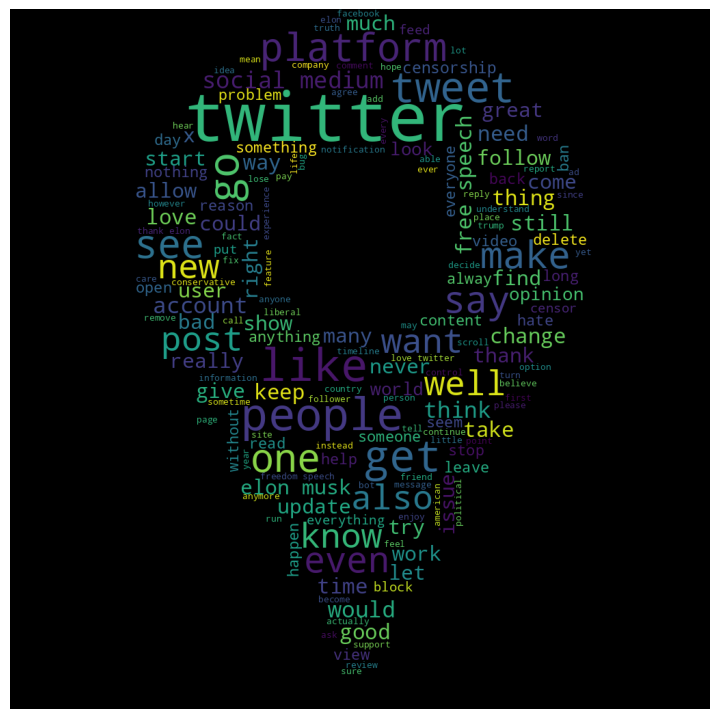

In [ ]:
#Analysis of Review field
stopword = set(stopwords.words('english'))
text = " ".join(review for review in data.complete_review)
mask = np.array(Image.open("loc.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('review_sentiment.png')
plt.show()

In [ ]:
#positive negative & neutral sentiment:
positive = data[data['sentiment'] == 2]
negative = data[data['sentiment'] == 0]
neutral = data[data['sentiment'] == 1]

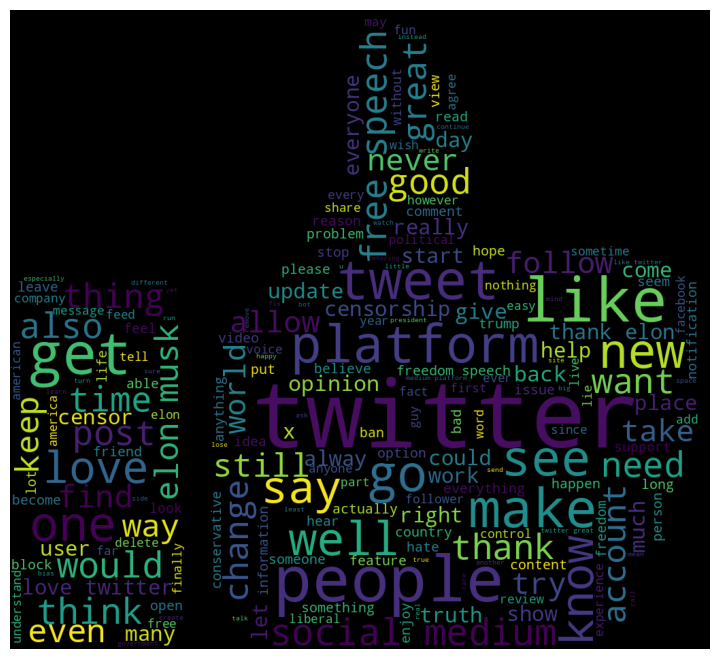

In [ ]:
#Positive Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in positive.complete_review)
mask = np.array(Image.open("thumbs_up.png"))
wordcloud = WordCloud(width = 2200, height = 2300,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('positive_sentiment.png')
plt.show()
wordcloud.to_file("posid.png")

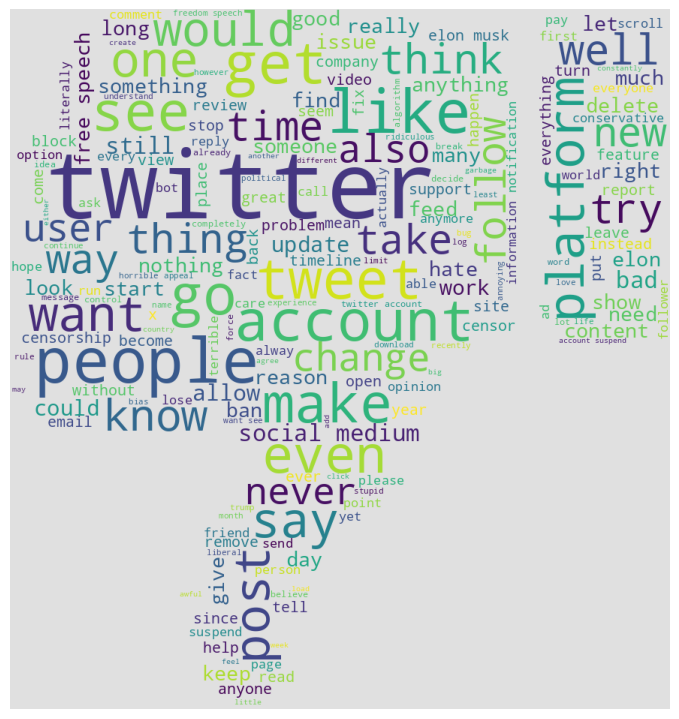

In [ ]:
#Negative Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in negative.complete_review)
mask = np.array(Image.open("./thumbs_down.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='#E0E0E0',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('negative_sentiment.png')
plt.show()

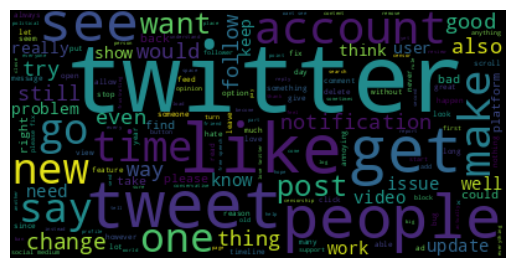

In [ ]:
#Neutral Sentiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in neutral.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis Model


<h3> Bag of Word Vectorization </h3>

In [ ]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X = cv.fit_transform(data['complete_review'])
y = data['sentiment']

Handle Imbalanced Data

In [ ]:
# Instantiate the SMOTE object
smote = SMOTE()

# Perform oversampling
X_oversampled, y_oversampled = smote.fit_resample(X, y)

Train, Test Split

In [ ]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled,y_oversampled,test_size=0.15,random_state=17,stratify=y_oversampled)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19612, 19069)
(3461, 19069)
(19612,)
(3461,)


<h3> Multinomial Naive Bayes </h3>

In [ ]:
#Training the model
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

#Caluclating the accuracy score of the model
y_pred = MNB.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60      1053
           1       0.73      0.66      0.69      1278
           2       0.68      0.69      0.69      1130

    accuracy                           0.66      3461
   macro avg       0.66      0.66      0.66      3461
weighted avg       0.67      0.66      0.66      3461



Logistic Regression

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.61      0.69      0.64      1019
           1       0.86      0.70      0.77      1419
           2       0.68      0.77      0.72      1023

    accuracy                           0.72      3461
   macro avg       0.72      0.72      0.71      3461
weighted avg       0.73      0.72      0.72      3461



<h3> Random Forest </h3>

In [ ]:
# Initialize and train the random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73      1229
           1       0.89      0.82      0.85      1262
           2       0.64      0.76      0.69       970

    accuracy                           0.76      3461
   macro avg       0.76      0.76      0.76      3461
weighted avg       0.77      0.76      0.76      3461



XGBoost

In [ ]:
# Create DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Set the objective function for multi-class classification
    'num_class': 3,      # Number of classes in the dataset
    'eval_metric': 'merror',        # Evaluation metric (multi-class classification error rate)
    'eta': 0.4,                    # Learning rate
    'max_depth': 6,                # Maximum depth of a tree
    'subsample': 0.8,              # Subsample ratio of the training instances
    'colsample_bytree': 0.8,       # Subsample ratio of features when constructing each tree
    'seed': 42                     # Random seed for reproducibility
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
preds = model.predict(dtest)
pred_labels = [int(pred) for pred in preds]

print(classification_report(pred_labels, y_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1083
           1       0.88      0.97      0.92      1058
           2       0.91      0.79      0.85      1320

    accuracy                           0.87      3461
   macro avg       0.87      0.88      0.87      3461
weighted avg       0.87      0.87      0.87      3461



#Conclusion

The best-performing model was identified as XGBoost, which achieved an accuracy of 87% with the f1-score of 0.85 and above for all the labels(positive,negative & neutral). This model demonstrates the ability to accurately predict sentiment based on ChatGPT iOS reviews.

Overall, with the developed sentiment analysis model, we can effectively analyze and understand the sentiment expressed in ChatGPT reviews. This provides valuable insights for businesses, helping them make informed decisions, improve customer satisfaction, and enhance their products and services based on customer feedback.

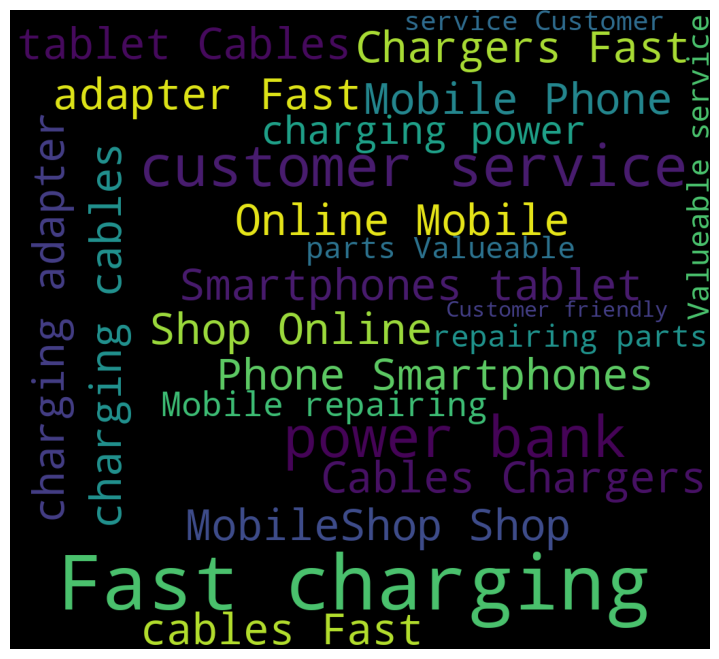

In [ ]:
#Positive Setiment
text = "MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service"

mask = np.array(Image.open("posid.png"))
wordcloud = WordCloud(width = 1700, height = 3300,
                 background_color ='black',
                min_font_size = 30, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('pds.png')
plt.show()
wordcloud.to_file("spd.png")



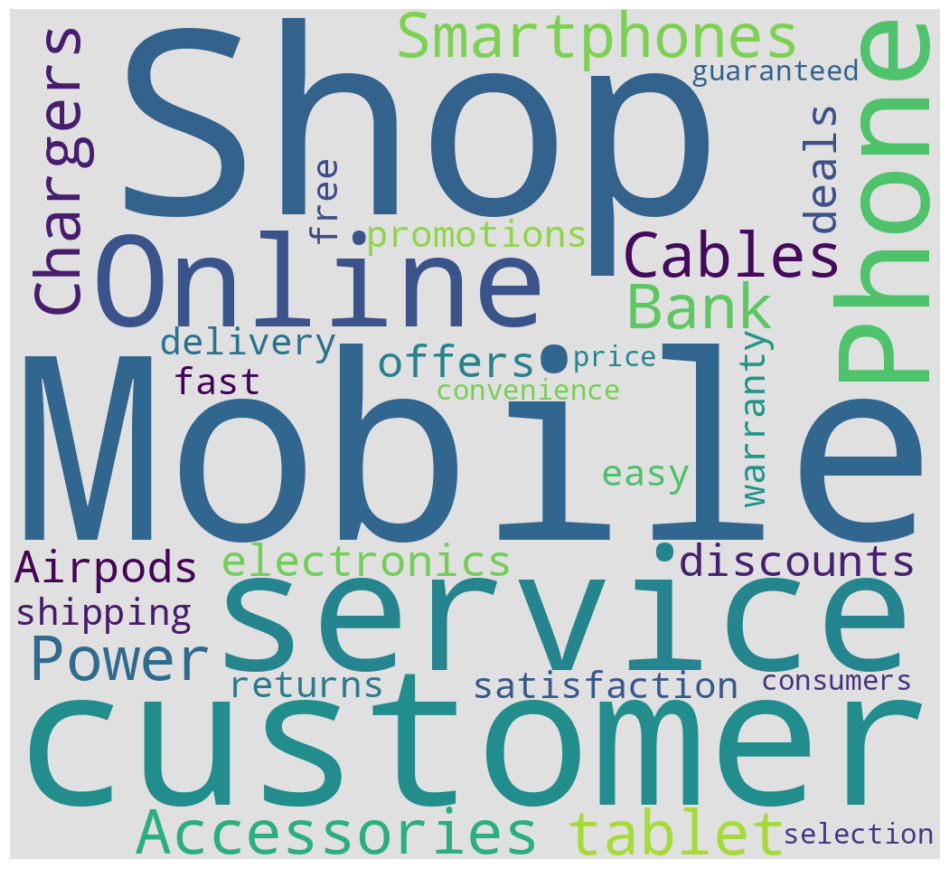

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

image_path = "pds.png"
image = Image.open(image_path)

wordcloud = WordCloud( background_color ='#E0E0E0',mask=mask)
text = "Mobile Shop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service"
wordcloud.generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the wordcloud image (optional)
wordcloud.to_file("wordcloud.png")